In [1]:
import sys
sys.path.append("..")

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from data_warehouse.db import connect

In [48]:
cur, conn = connect()

# Creating Songs Table

In [49]:
query = """
select song_id,
       title,
       artist_id,
       year,
       duration,
       count(*) as count
  from staging_songs
 where song_id = 'SOMFTUN12A6D4F60A5'
 group by song_id, title, artist_id, year, duration
 order by song_id, count desc;
"""

In [50]:
pd.read_sql(query, conn)

,song_id,title,artist_id,year,duration,count
0,SOMFTUN12A6D4F60A5,Teddy Picker,ARM0P6Z1187FB4D466,2007.0,165.14567,1
1,SOMFTUN12A6D4F60A5,Teddy Picker (Explicit),ARM0P6Z1187FB4D466,2007.0,162.45506,2


## Analyze Data Warehouse

In [51]:
query = """
select artists.name,
       temp.count_songplays
  from (select artist_id,
               count(songplay_id) as count_songplays
          from songplays
         group by artist_id) as temp
  left join artists
    on temp.artist_id = artists.artist_id
 order by temp.count_songplays desc
 limit 10;
"""

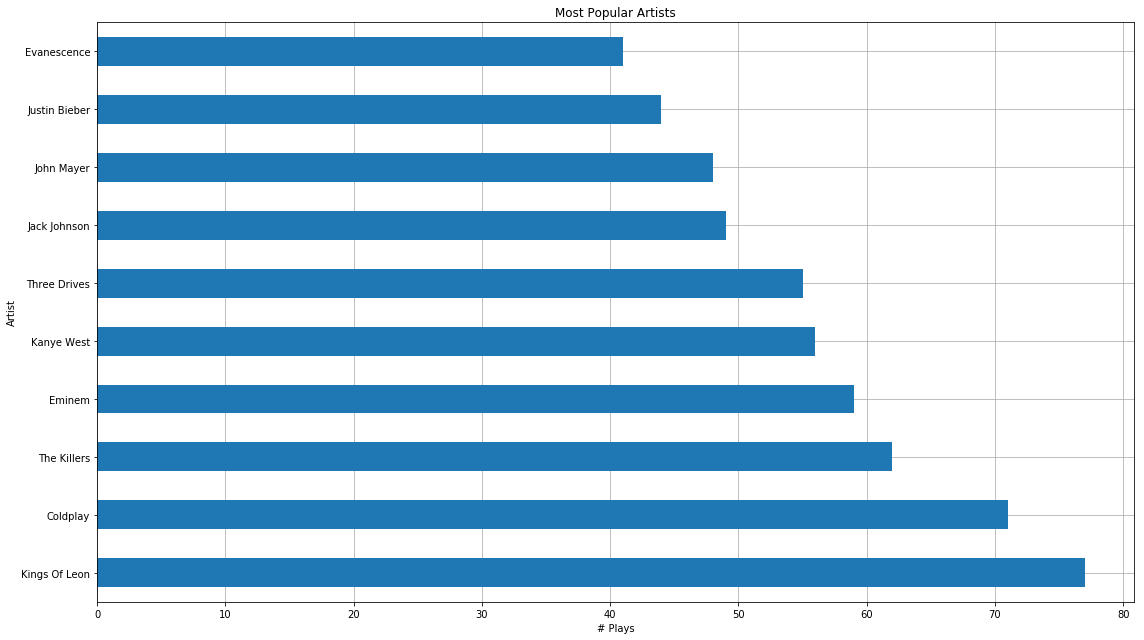

In [52]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="name", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Artist")
ax.set_title("Most Popular Artists")

plt.tight_layout()
plt.savefig("../plots/most_popular_artists.png", dpi=120)

In [53]:
query = """
select songs.title || ' - ' || artists.name as song_artist,
       temp.count_songplays
  from (select song_id,
               count(songplay_id) as count_songplays
          from songplays
         group by song_id) as temp
  left join songs
  on temp.song_id = songs.song_id
  left join artists
  on songs.artist_id = artists.artist_id
  order by temp.count_songplays desc
  limit 10;
"""

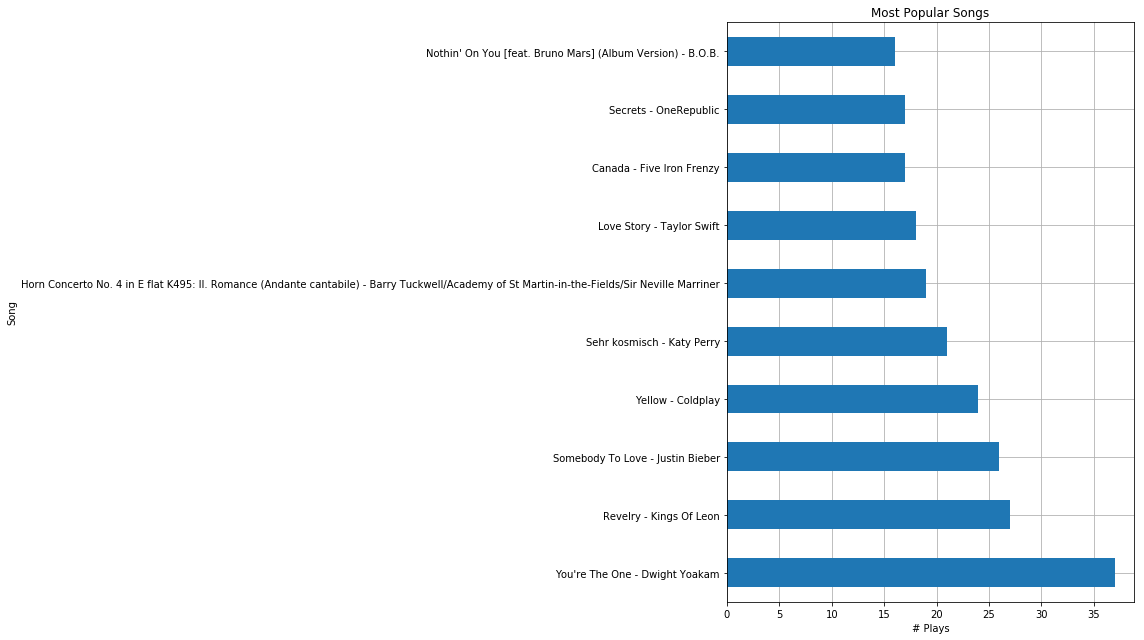

In [54]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="song_artist", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Song")
ax.set_title("Most Popular Songs")

plt.tight_layout()
plt.savefig("../plots/most_popular_songs.png", dpi=120)

In [55]:
query = """
select users.gender || ', ' || users.level as gender_level,
       count(songplays.songplay_id)
  from songplays
  left join users
    on songplays.user_id = users.user_id
 group by users.gender, users.level
 order by users.gender, users.level;
"""

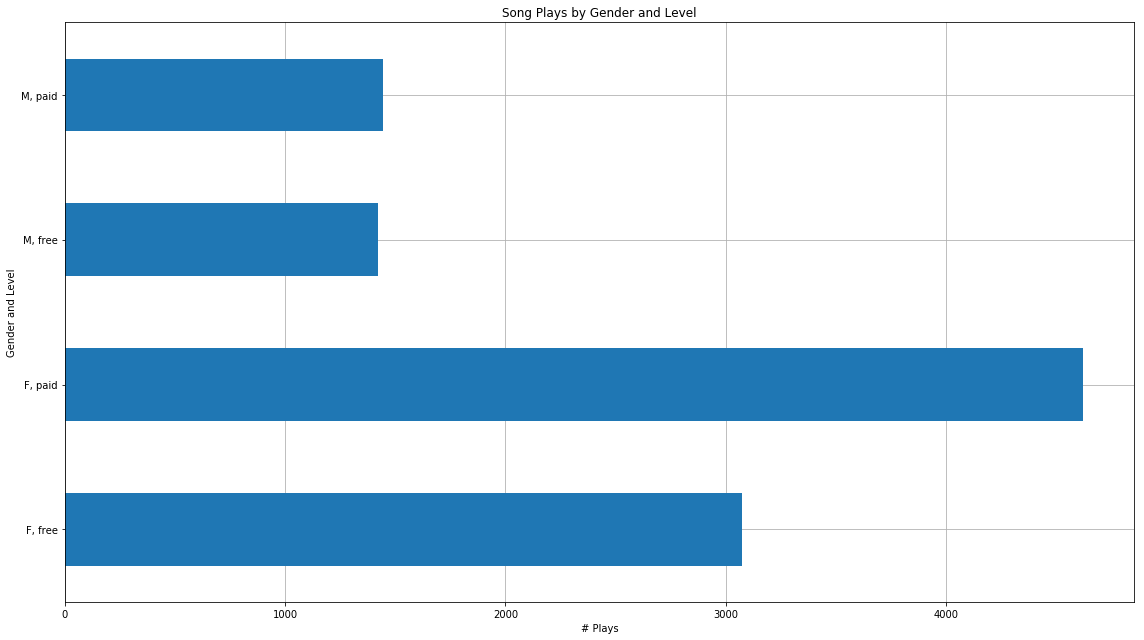

In [56]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Level")

plt.tight_layout()
plt.savefig("../plots/songplays_by_gender_and_level.png", dpi=120)

In [57]:
query = """
select time.hour,
       count(songplays.songplay_id) as count_songplays
  from songplays
  left join time
    on songplays.start_time = time.start_time
 group by hour
 order by hour;
"""

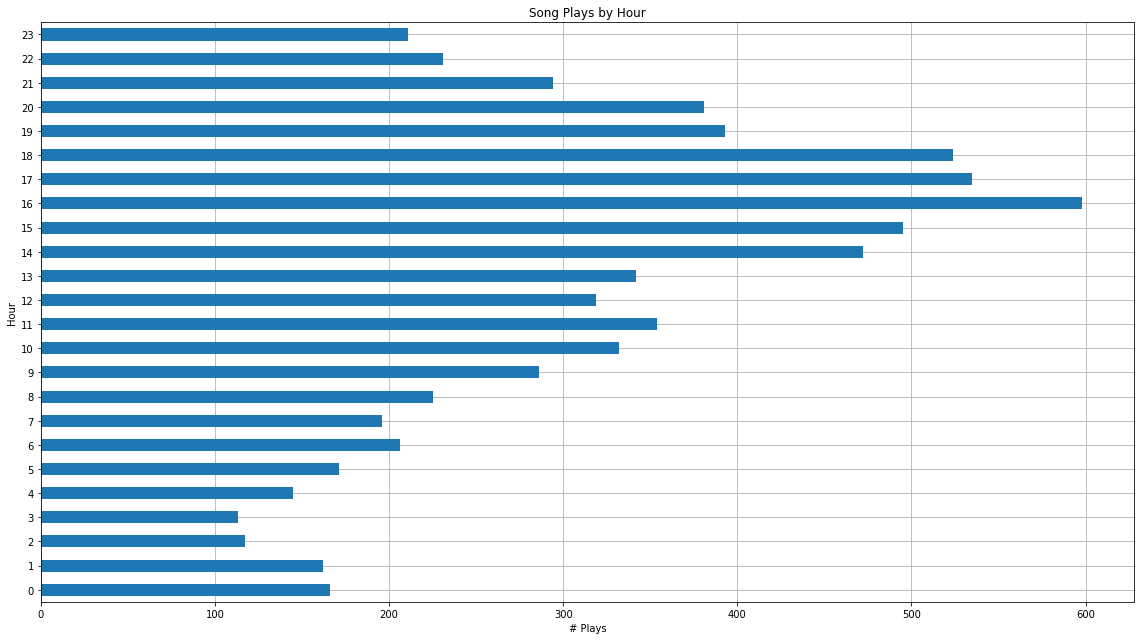

In [58]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="hour", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Hour")
ax.set_title("Song Plays by Hour")

plt.tight_layout()
plt.savefig("../plots/songplays_by_hour.png", dpi=120)